# This file uses the updated.csv with New_Categry column

---



In [ ]:
!pip install noisereduce
!pip install praat-parselmouth
!pip install --upgrade librosa
!pip install librosa scipy
!pip install pysptk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 461.9/461.9 kB 6.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pysptk: filename=pysptk-1.0.1-cp310-cp310-linux_x86_64.whl size=1241916 sha256=9efe3eab42fabb7f37919158457cd5bf6a6984ed61675dab1b0d013aa40d0b52
  Stored in directory: /root/.cache/pip/wheels/ba/c2/7f/73c54e1795eeca8f995f95474c8290b78ee0a6306412dc934f
Successfully built pysptk


In [ ]:
import pandas as pd
import numpy as np
import librosa
import parselmouth
from parselmouth.praat import call
import scipy.stats as stats
import scipy
import pysptk
from scipy.io import wavfile
from tqdm import tqdm
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import os

Mounted at /content/drive


In [ ]:
!pip install -U path.py
import os
from path import Path
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load File

In [ ]:
df = pd.read_csv('/content/drive/Shared drives/CS298/CS 297/IEMOCAP/IEMOCAP_Updated.csv')
df.dropna(subset=['New_Category'], inplace=True)
df.head()

,Session,Conversation,Audio_Path,Speaker_id,Transcript,Time_Frame,Major_emotion,Audio_Uttrance_Path,Major_Emotion,Major,...,Valence,Dominance,dimension,category,act,val,dom,New_Category,Final_class,Unnamed: 20
0,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M000,Good God.,006.2551-008.1400,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,...,"[3, 3]","[4, 4]","[{'arousal': 3.0, 'valence': 3.0, 'dominance':...","['Frustration', 'Fear', 'Excited']","2,4","3,3","4,4",Nervous,NaN,NaN
1,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F000,Do you think it's them?,007.7500-009.1900,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,...,"[4, 4]","[3, 4]","[{'arousal': 3.5, 'valence': 2.0, 'dominance':...","['Frustration', 'Fear', 'Excited']","2,5","2,2","3,4",Nervous,NaN,NaN
2,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M001,I wonder.,008.6300-009.6700,Fear,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Fear']",Fear,...,"[3, 3]","[3, 4]","[{'arousal': 3.0, 'valence': 3.0, 'dominance':...","['Fear', 'Fear', 'Excited']","2,4","3,3","3,4",Nervous,NaN,NaN
3,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F001,Nobody knows we're here except Freda and she w...,009.2300-011.8600,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,...,"[3, 4]","[3, 4]","[{'arousal': 4.0, 'valence': 2.5, 'dominance':...","['Frustration', 'Fear', 'Excited']","3,5","3,2","3,4",Nervous,NaN,NaN
4,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M002,It must be them then.,011.4300-012.7900,Fear,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Fear']",Fear,...,"[4, 3]","[3, 4]","[{'arousal': 3.0, 'valence': 2.5, 'dominance':...","['Fear', 'Fear', 'Excited']","2,4","2,3","3,4",Nervous,NaN,NaN


In [ ]:
merged_df = df[['Speaker_id', 'Transcript', 'New_Category']].rename(columns={'New_Category': 'Emotion'})
merged_df['Emotion'] = merged_df['Emotion'].str.strip().str.lower()

merged_df.head()

,Speaker_id,Transcript,Emotion
0,Ses04F_script03_1_M000,Good God.,nervous
1,Ses04F_script03_1_F000,Do you think it's them?,nervous
2,Ses04F_script03_1_M001,I wonder.,nervous
3,Ses04F_script03_1_F001,Nobody knows we're here except Freda and she w...,nervous
4,Ses04F_script03_1_M002,It must be them then.,nervous


In [ ]:
merged_df['Emotion'] = merged_df['Emotion'].replace('excited', 'happy')
merged_df = merged_df[~merged_df['Emotion'].str.contains('nervous', na=False)]


In [ ]:
# Recalculate the emotion counts
emotion_counts = merged_df['Emotion'].value_counts()

# Print the updated counts
for emotion, count in emotion_counts.items():
    print(f"{emotion}: {count}")

happy: 308
neutral: 291
angry: 273
sad: 271


In [ ]:
import re

# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphanumeric characters (keeping spaces)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text

# Apply the preprocessing function to the 'Transcript' column
merged_df['Transcript'] = merged_df['Transcript'].apply(preprocess_text)

# Display the first few entries to verify changes
merged_df.head()


,Speaker_id,Transcript,Emotion
5,Ses04F_script03_1_F002,well what are we going to do,neutral
6,Ses04F_script03_1_M003,well be alright darling whatever happens aren...,neutral
7,Ses04F_script03_1_F003,now and always sweet,neutral
8,Ses04F_script03_1_M004,i dont care then,neutral
10,Ses04F_script03_1_M005,hello hello what wrong number,angry


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'merged_df' is your DataFrame containing the 'Emotion' and 'Transcript' columns

# Text preprocessing
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(merged_df['Transcript'])
y = merged_df['Emotion']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.4279475982532751
              precision    recall  f1-score   support

       angry       0.48      0.35      0.41        65
       happy       0.53      0.51      0.52        57
     neutral       0.31      0.42      0.36        52
         sad       0.43      0.44      0.43        55

    accuracy                           0.43       229
   macro avg       0.44      0.43      0.43       229
weighted avg       0.44      0.43      0.43       229



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=1000)

# Apply the vectorizer to the Transcript column
X = vectorizer.fit_transform(merged_df['Transcript'])
y = merged_df['Emotion']

# Proceed with splitting the data and training the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42, multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Predict the emotions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.40611353711790393
              precision    recall  f1-score   support

       angry       0.59      0.37      0.45        65
       happy       0.48      0.42      0.45        57
     neutral       0.28      0.40      0.33        52
         sad       0.38      0.44      0.41        55

    accuracy                           0.41       229
   macro avg       0.43      0.41      0.41       229
weighted avg       0.44      0.41      0.41       229



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Text tokenization and padding
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(merged_df['Transcript'])
sequences = tokenizer.texts_to_sequences(merged_df['Transcript'])
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

# Label encoding
encoder = LabelEncoder()
y = encoder.fit_transform(merged_df['Emotion'])
y = tf.keras.utils.to_categorical(y)  # Convert labels to one-hot encoding

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)


In [ ]:
merged_df['Transcript'].apply(lambda x: len(x.split())).max()

85

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Generate an array of indices the same length as dataset
# Text tokenization and padding
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(merged_df['Transcript'])
sequences = tokenizer.texts_to_sequences(merged_df['Transcript'])
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')
indices = np.arange(padded_sequences.shape[0])

# Label encoding
encoder = LabelEncoder()
y = encoder.fit_transform(merged_df['Emotion'])
y = tf.keras.utils.to_categorical(y)  # Convert labels to one-hot encoding

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    padded_sequences, y, indices, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

from tensorflow.keras.optimizers import Adam

# Initialize the Adam optimizer with a custom learning rate
learning_rate = 0.001  # You can adjust this value
optimizer = Adam(learning_rate=learning_rate)

# Model definition remains the same
'''
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=85),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(32, activation='relu'),
    Dense(y.shape[1], activation='softmax')
])
'''
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=85),
    LSTM(64),  # Using a single LSTM layer
    Dense(32, activation='relu'),
    Dense(y.shape[1], activation='softmax')  # Output layer with one neuron per class
])

# Compile the model with the custom optimizer
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Training the model with adjusted learning rate
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=32)



Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.2676 - loss: 1.3862 - val_accuracy: 0.2489 - val_loss: 1.3909
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.2595 - loss: 1.3860 - val_accuracy: 0.2489 - val_loss: 1.3923
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.2652 - loss: 1.3845 - val_accuracy: 0.2489 - val_loss: 1.3923
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.2652 - loss: 1.3844 - val_accuracy: 0.2489 - val_loss: 1.3924
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.2652 - loss: 1.3842 - val_accuracy: 0.2489 - val_loss: 1.3924
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.2652 - loss: 1.3841 - val_accuracy: 0.2489 - val_loss: 1.3925
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.2652 - loss: 1.3841 - val_accuracy: 0.2489 - val_loss: 1.3921
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.2652 - loss: 1.3841 - val_accuracy: 0.2489 - val_loss: 1

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2473 - loss: 1.3918
Test Accuracy: 0.24890829622745514
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
F1 Score: 0.09921519528506428
Confusion Matrix:
 [[ 0 65  0  0]
 [ 0 57  0  0]
 [ 0 52  0  0]
 [ 0 55  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.25      1.00      0.40        57
           2       0.00      0.00      0.00        52
           3       0.00      0.00      0.00        55

    accuracy                           0.25       229
   macro avg       0.06      0.25      0.10       229
weighted avg       0.06      0.25      0.10       229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


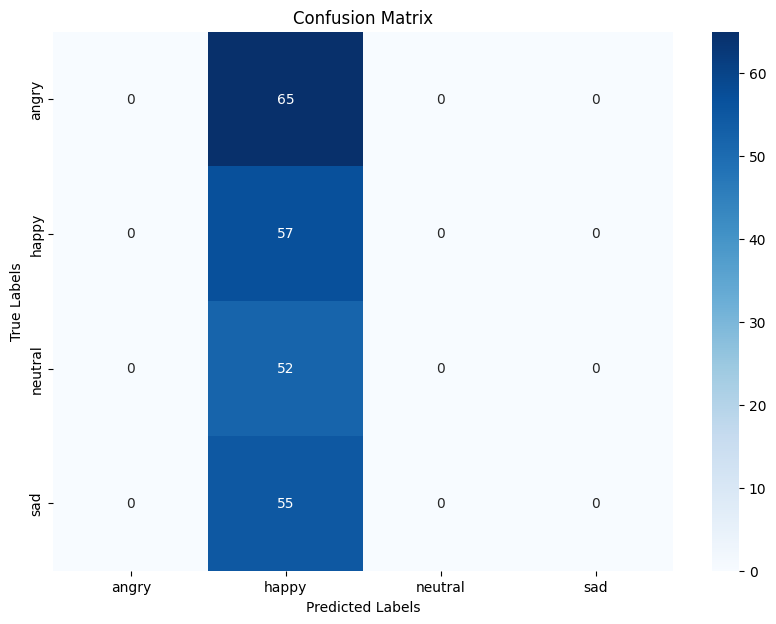

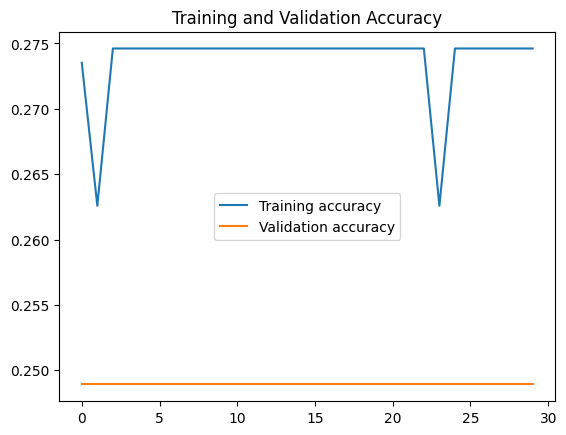

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical

def evaluate_model(model, X_test, y_test, history, class_labels):
    # Evaluate the model on the test data
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print("Test Accuracy:", test_acc)

    # Predict the test set results for F1 and Confusion Matrix
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Compute the F1 Score
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    print("F1 Score:", f1)

    # Generate and display the confusion matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    print("Confusion Matrix:\n", cm)

    # Classification report
    print(classification_report(y_true_classes, y_pred_classes))

    # Plotting the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

# Example of using the function
# Assuming 'model', 'X_test', 'y_test', 'history', and 'encoder.classes_' are defined and available
evaluate_model(model, X_test, y_test, history, encoder.classes_)


In [ ]:
def model_1(vocab_size, output_size):
    tf.random.set_seed(42)
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=40, input_length=85),
        Bidirectional(LSTM(100)),
        Dense(output_size, activation='softmax')
    ])
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Assuming vocab_size from tokenizer and output_size from label_encoder
vocab_size = 10000  # or len(tokenizer.word_index) + 1
output_size = len(encoder.classes_)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restores model weights from the epoch with the lowest validation loss
)
# Initialize the model
model = model_1(vocab_size, output_size)

# Train the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test),
                    batch_size=32, callbacks=[early_stopping])

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 154ms/step - accuracy: 0.2300 - loss: 1.3863 - val_accuracy: 0.2620 - val_loss: 1.3794
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 207ms/step - accuracy: 0.3435 - loss: 1.3598 - val_accuracy: 0.3537 - val_loss: 1.3479
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - accuracy: 0.4006 - loss: 1.3061 - val_accuracy: 0.3843 - val_loss: 1.3004
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 220ms/step - accuracy: 0.4625 - loss: 1.2110 - val_accuracy: 0.3581 - val_loss: 1.2863
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 0.5356 - loss: 1.1112 - val_accuracy: 0.3930 - val_loss: 1.2618
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 224ms/step - accuracy: 0.5868 - loss: 0.9815 - val_accuracy: 0.4105 - val_loss: 1.2852
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - accuracy: 0.6756 - loss: 0.8554 - val_accuracy: 0.4192 - val_loss: 1.3222
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 181ms/step - accuracy: 0.7260 - loss: 0.7417 - val_accuracy: 0.4017 - val_

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3645 - loss: 1.2478
Test Accuracy: 0.3930130898952484
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step
F1 Score: 0.39353979600146916
Confusion Matrix:
 [[33  6 18  8]
 [ 4 25 17 11]
 [16  7 19 10]
 [17  9 16 13]]
              precision    recall  f1-score   support

           0       0.47      0.51      0.49        65
           1       0.53      0.44      0.48        57
           2       0.27      0.37      0.31        52
           3       0.31      0.24      0.27        55

    accuracy                           0.39       229
   macro avg       0.40      0.39      0.39       229
weighted avg       0.40      0.39      0.39       229



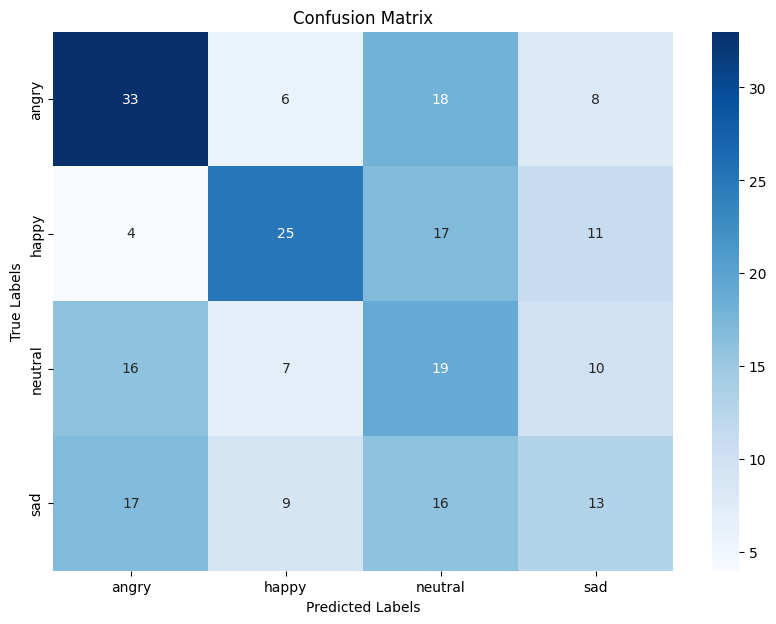

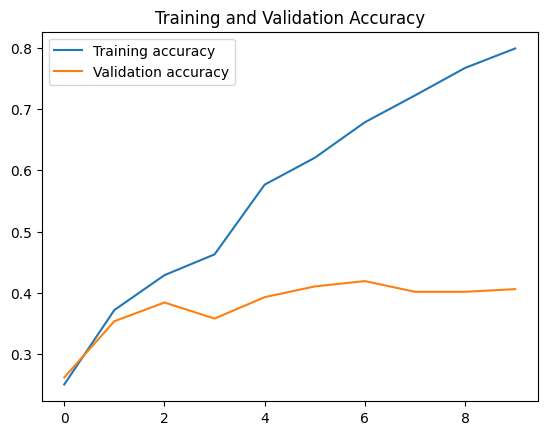

In [ ]:
evaluate_model(model, X_test, y_test, history, encoder.classes_)


### Attention

In [ ]:
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K

class Attention(Layer):
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(Attention, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                 initializer="zeros")

        super(Attention, self).build(input_shape)

    def call(self, x):
        # Applying the attention mechanism
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        output = x * a

        if self.return_sequences:
            return output

        return K.sum(output, axis=1)


def build_model(vocab_size, output_size):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=64, input_length=85),
        Bidirectional(LSTM(100, return_sequences=True)),
        Attention(return_sequences=False),  # Use attention mechanism
        Dense(64, activation='relu'),
        Dense(output_size, activation='softmax')
    ])

    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# Example usage
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restores model weights from the epoch with the lowest validation loss
)
model = build_model(vocab_size=10000, output_size=4)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 180ms/step - accuracy: 0.2370 - loss: 1.3927 - val_accuracy: 0.2271 - val_loss: 1.3978
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.2767 - loss: 1.3924 - val_accuracy: 0.2489 - val_loss: 1.3912
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.2655 - loss: 1.3830 - val_accuracy: 0.2533 - val_loss: 1.3896
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 229ms/step - accuracy: 0.2841 - loss: 1.3745 - val_accuracy: 0.3013 - val_loss: 1.3519
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - accuracy: 0.3610 - loss: 1.3318 - val_accuracy: 0.3755 - val_loss: 1.3255
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 233ms/step - accuracy: 0.3584 - loss: 1.2941 - val_accuracy: 0.4148 - val_loss: 1.2994
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 161ms/step - accuracy: 0.4238 - loss: 1.2004 - val_accuracy: 0.3930 - val_loss: 1.3242
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 238ms/step - accuracy: 0.4624 - loss: 1.1293 - val_accuracy: 0.4148 - va

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.4218 - loss: 2.5459
Test Accuracy: 0.4410480260848999
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step
F1 Score: 0.44092999948044415
Confusion Matrix:
 [[27 11 12 15]
 [ 4 29 12 12]
 [17  5 19 11]
 [13 10  6 26]]
              precision    recall  f1-score   support

           0       0.44      0.42      0.43        65
           1       0.53      0.51      0.52        57
           2       0.39      0.37      0.38        52
           3       0.41      0.47      0.44        55

    accuracy                           0.44       229
   macro avg       0.44      0.44      0.44       229
weighted avg       0.44      0.44      0.44       229



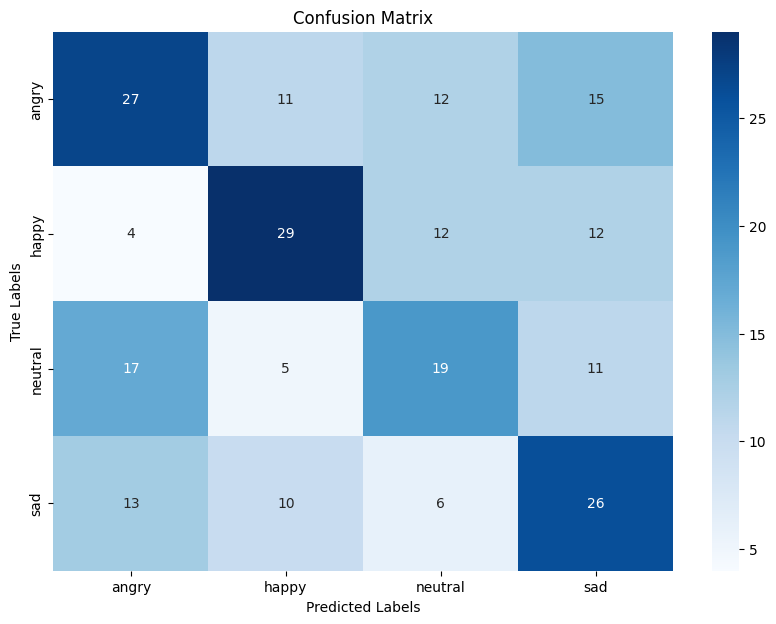

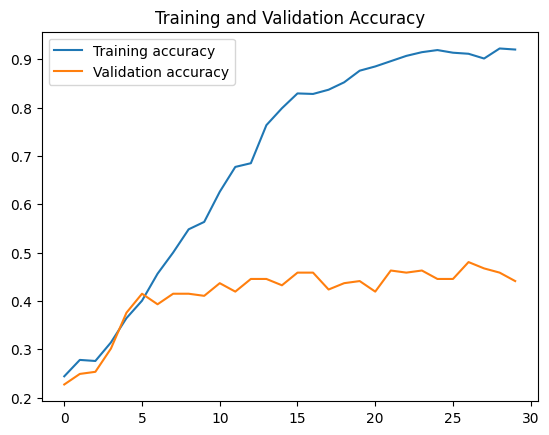

In [ ]:
evaluate_model(model, X_test, y_test, history, encoder.classes_)


In [ ]:
import pandas as pd
import numpy as np
speaker_ids_test = merged_df.iloc[idx_test]['Speaker_id'].tolist()

def evaluate_and_display_predictions_with_transcript_and_speaker(model, X_test, y_test, idx_test, class_labels, speaker_ids):
    # Predict the test set results
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Fetch transcripts and speaker_ids based on test indices
    transcripts = merged_df.iloc[idx_test]['Transcript'].tolist()

    # Convert numeric labels back to original labels
    predicted_labels = [class_labels[i] for i in y_pred_classes]
    true_labels = [class_labels[i] for i in y_true_classes]

    # Create a DataFrame to display the speaker_id, transcripts, true labels, predicted labels
    results_df = pd.DataFrame({
        'Speaker ID': speaker_ids,
        'Transcript': transcripts,
        'True Label': true_labels,
        'Predicted Label': predicted_labels,
        'Predicted Probability': np.max(y_pred, axis=1)
    })



    return results_df  # Return the DataFrame in case you need it for further analysis

# Usage of the function
class_labels = encoder.classes_
results_df = evaluate_and_display_predictions_with_transcript_and_speaker(model, X_test, y_test, idx_test, class_labels, speaker_ids_test)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [ ]:
# Display the DataFrame
results_df

,Speaker ID,Transcript,True Label,Predicted Label,Predicted Probability
0,Ses04F_impro03_M021,i know but you just asked me to,angry,happy,0.627469
1,Ses05F_impro02_M029,i understand im worried about you i dont kno...,sad,sad,0.999444
2,Ses04F_script01_1_F039,well you dont want to think that way,sad,neutral,0.885666
3,Ses04M_impro04_M020,well i mean it makes sense doesnt it hmm,neutral,sad,0.997695
4,Ses04F_script03_2_M034,there are people downstairs i suppose,neutral,angry,0.986288
...,...,...,...,...,...
224,Ses04M_impro02_F007,cant you ask them cant you go back and ask th...,sad,angry,0.778005
225,Ses04F_script03_2_F013,oh dont be so stupid,angry,happy,0.611026
226,Ses04M_impro02_M010,its not its not its not like that its not lik...,sad,angry,0.995783
227,Ses04F_script01_1_M008,being dishonest with him that kind of thing al...,sad,angry,0.528399


# **Model 2**

In [ ]:
def build_model_2(vocab_size, output_size):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=64, input_length=85, trainable=True),
        Bidirectional(LSTM(128, return_sequences=True)),
        Dropout(0.3),
        Attention(return_sequences=False),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(output_size, activation='softmax')
    ])

    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [ ]:
model2 = build_model_2(vocab_size=10000, output_size=4)
history = model2.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 296ms/step - accuracy: 0.2256 - loss: 1.3906 - val_accuracy: 0.2489 - val_loss: 1.3924
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 377ms/step - accuracy: 0.2560 - loss: 1.3856 - val_accuracy: 0.2489 - val_loss: 1.3930
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 279ms/step - accuracy: 0.2677 - loss: 1.3835 - val_accuracy: 0.2751 - val_loss: 1.3834
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 369ms/step - accuracy: 0.3120 - loss: 1.3622 - val_accuracy: 0.3362 - val_loss: 1.3635
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 281ms/step - accuracy: 0.3138 - loss: 1.3310 - val_accuracy: 0.3843 - val_loss: 1.3063
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 287ms/step - accuracy: 0.3894 - loss: 1.2260 - val_accuracy: 0.3624 - val_loss: 1.3375
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 380ms/step - accuracy: 0.4252 - loss: 1.1664 - val_accuracy: 0.4105 - val_loss: 1.3018
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 279ms/step - accuracy: 0.4800 - loss: 1.0528 - val_accuracy: 0.441

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.4259 - loss: 3.6061
Test Accuracy: 0.4628821015357971
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step
F1 Score: 0.46608792910720626
Confusion Matrix:
 [[31  7  9 18]
 [ 4 24 14 15]
 [13  3 27  9]
 [15  4 12 24]]
              precision    recall  f1-score   support

           0       0.49      0.48      0.48        65
           1       0.63      0.42      0.51        57
           2       0.44      0.52      0.47        52
           3       0.36      0.44      0.40        55

    accuracy                           0.46       229
   macro avg       0.48      0.46      0.47       229
weighted avg       0.48      0.46      0.47       229



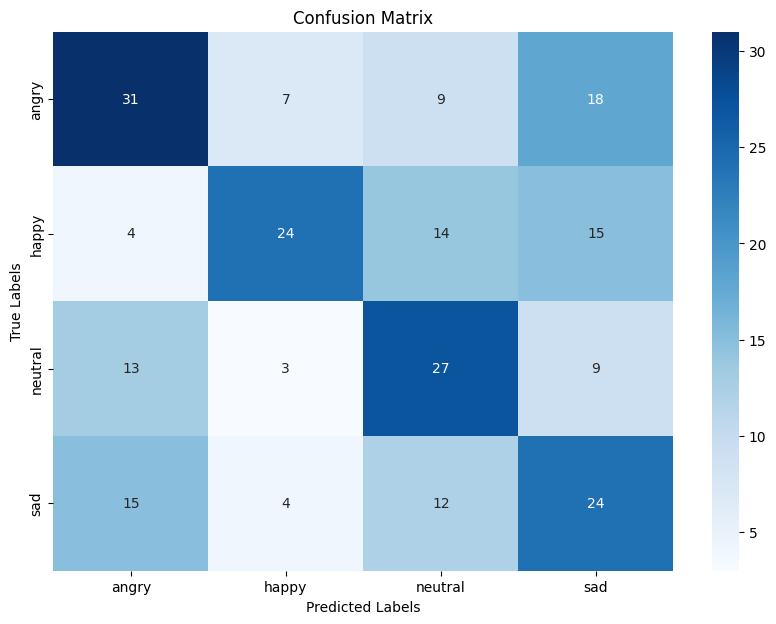

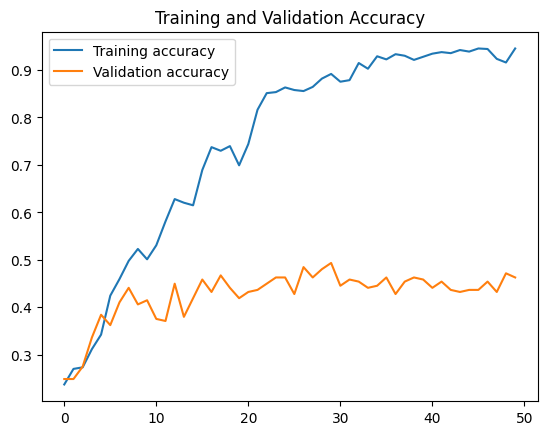

In [ ]:
evaluate_model(model2, X_test, y_test, history, encoder.classes_)
